## Part 1: Leaf Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'0.25.1'

In [7]:
# Read in dataset
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


In [8]:
# Print total missing values in "eccentricity" column
print(str('Missing values in the \"eccentricity\" column: ') + str(leaf_data['eccentricity'].isnull().sum()))

Missing values in the "eccentricity" column: 5


In [9]:
# Replace any missing "eccentricity" values
leaf_data['eccentricity']=leaf_data['eccentricity'].astype(float) #convert data from strings to floats
mean = leaf_data['eccentricity'].mean()
print("mean =", mean)

leaf_data['eccentricity'].fillna(mean, inplace=True) #make it mean
         
leaf_data.head()

mean = 0.5675259574468084


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


In [10]:
# Standardize eccentricity column
leaf_data['eccentricity_std'] = leaf_data['eccentricity']
leaf_data['eccentricity_std'] = (leaf_data['eccentricity_std'] - leaf_data['eccentricity_std'].mean()) / leaf_data['eccentricity_std'].std()
leaf_data.head()


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,eccentricity_std
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,4.578673e-16
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.763441e+00
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.545119e+00
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-1.872588e-01
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-9.691060e-01


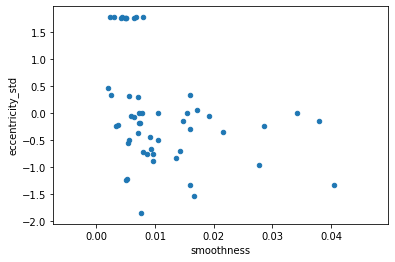

In [11]:
# Create a scatter plot between smoothness and standardized eccentricity
leaf_data.plot.scatter(x = 'smoothness', y = 'eccentricity_std')

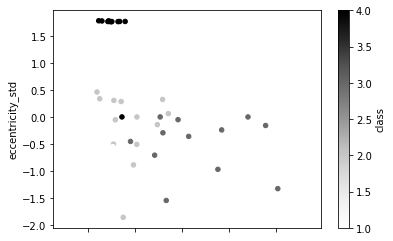

In [12]:
# Add different color to each "class" label
leaf_data.plot.scatter(x = 'smoothness', y = 'eccentricity_std', c = 'class')

In [13]:
# Calculate the correlation coefficient between the standardized eccentricity and the smoothness column
print(leaf_data['eccentricity_std'].corr(leaf_data['smoothness']))


-0.35441842207550006


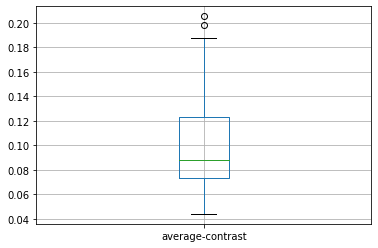

In [14]:
# Create a plot to determine if there are any outliers in the average-contrast attribute
plot = leaf_data.boxplot(column = 'average-contrast')

## Part 2: Adult Census Dataset


Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [15]:
# Read in data
# Add skipinitialspace=True to skip spaces after delimiter
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# Show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

education
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
Elem-school      1147
HS-grad         10501
High-school      3055
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64


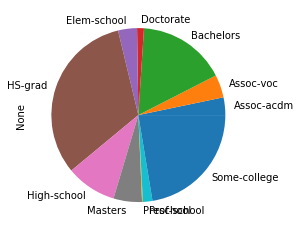

In [17]:
# Show the distribution of the dataset with respect to the education column
groups = adult_data.groupby('education')
print(groups.size())
groups.size().plot.pie()

In [18]:
# Group the adult_data using the marital-status column
from pandas.api.types import is_numeric_dtype
marital_group = adult_data.groupby('marital-status')
# Display the mean, median and standard deviation statistics of hours-per-week column for each marital-status column
print(marital_group['hours-per-week'].describe()[['mean', '50%', 'std']])


                            mean   50%        std
marital-status                                   
Divorced               41.246680  40.0  10.676632
Married-AF-spouse      41.130435  40.0  19.440596
Married-civ-spouse     43.284856  40.0  11.905047
Married-spouse-absent  39.669856  40.0  11.767374
Never-married          36.939998  40.0  12.432542
Separated              39.301463  40.0  10.377534
Widowed                32.979859  40.0  14.058690


In [19]:
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

In [20]:
# Create a deep copy of the initial dataframe object so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()

# Add the new column to adult_data_copy
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


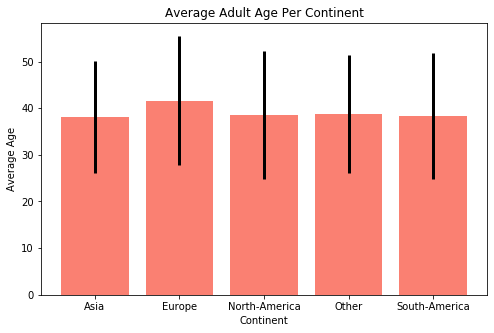

In [21]:
# Show the average age of adults from each continent with standard deviation on the same graph
data = adult_data_copy.groupby('continent')['age'].describe()[['mean', 'std']]
continent = []
mean = []
std = []
cnt = 0

for col, row in data.iterrows():
    continent.append(col)
    mean.append(row['mean'])
    std.append(row['std'])
    cnt += 1

plt.figure(figsize = (8, 5))
plt.xlabel('Continent')
plt.ylabel('Average Age')
plt.bar(continent, mean, width = 0.8, color = ('salmon'))
plt.errorbar(continent, mean, yerr = std, fmt = ' ', elinewidth = 3.0, ecolor = 'black')
plt.title('Average Adult Age Per Continent')

plt.show()
